# 1.Mengimport Library dan Module yang diperlukan dalam pengerjaan

In [77]:
import pandas as pd
import seaborn as sns
import sklearn
import warnings
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [78]:
df = pd.read_csv("Hasil_Postest4.csv", sep = ";")
df.head()

,Unnamed: 0,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,0,1,2,3
0,0,01/04/2020,1,1.0,1.00000,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,5.0,0.0,0.0,0.0,1.0
1,1,01/04/2020,2,2.0,3.94862,Cocomelon,TV Show,Yes,"Jul 21, 2017",5,5.0,0.0,0.0,0.0,1.0
2,2,01/04/2020,3,3.0,2.00000,All American,TV Show,Yes,"Mar 28, 2019",9,5.0,0.0,0.0,0.0,1.0
3,3,01/04/2020,4,4.0,3.94862,Blood Father,Movie,Yes,"Mar 26, 2020",5,5.0,0.0,1.0,0.0,0.0
4,4,01/04/2020,5,5.0,4.00000,The Platform,Movie,Yes,"Mar 20, 2020",9,5.0,0.0,1.0,0.0,0.0


# 2.Melakukan Pendekatan pada Supervised Learning dengan Classification


In [79]:
X = df[['Rank', 'Days In Top 10', 'Viewership Score']]
Y = df['Type']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

# 3.Melakukan Confusion Matrix dengan Algoritma Decission Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

print(X_test.shape)
print(Y_train.shape)

(1773, 3)
(5316,)


In [81]:
modelDTree = DecisionTreeClassifier().fit(X_train, Y_train)
prediction = modelDTree.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, prediction))

[[391   4 244]
 [  4   0   3]
 [361   8 758]]


In [82]:
print(sklearn.metrics.accuracy_score(Y_test, prediction)*100, '%')

64.80541455160744 %


# 4.Buat plot untuk hasil prediksi

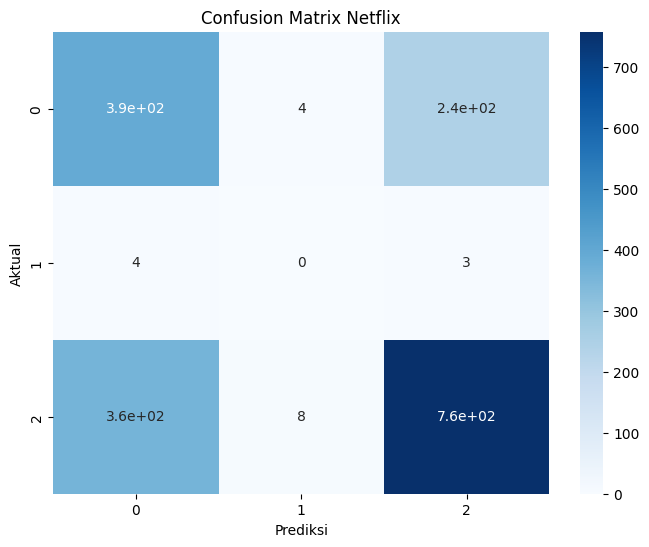

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Netflix')
plt.show()

# 4.Unsupervised Learning

In [86]:
warnings.filterwarnings('ignore')
df.head()

,Unnamed: 0,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,0,1,2,3
0,0,01/04/2020,1,1.0,1.00000,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,5.0,0.0,0.0,0.0,1.0
1,1,01/04/2020,2,2.0,3.94862,Cocomelon,TV Show,Yes,"Jul 21, 2017",5,5.0,0.0,0.0,0.0,1.0
2,2,01/04/2020,3,3.0,2.00000,All American,TV Show,Yes,"Mar 28, 2019",9,5.0,0.0,0.0,0.0,1.0
3,3,01/04/2020,4,4.0,3.94862,Blood Father,Movie,Yes,"Mar 26, 2020",5,5.0,0.0,1.0,0.0,0.0
4,4,01/04/2020,5,5.0,4.00000,The Platform,Movie,Yes,"Mar 20, 2020",9,5.0,0.0,1.0,0.0,0.0


# 5. Implementasi metode K-Means pada dataset

In [123]:
jumlah_target = df['Year to Date Rank'].nunique()
print("Jumlah_target dalam kolom 'Year to Date Rank':", jumlah_target)

Jumlah_target dalam kolom 'Year to Date Rank': 11


In [136]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

df['Days In Top 10'] = pd.to_numeric(df['Days In Top 10'], errors='coerce').fillna(0)
X = df[['Days In Top 10', 'Rank']]

# Menentukan jumlah cluster (K)
K = jumlah_target

# Membuat array warna yang sesuai dengan jumlah kluster (K)
colors = cm.get_cmap('viridis', K)

# Membuat model K-Means
kmeans = KMeans(n_clusters=K)

# Melatih model
kmeans.fit(X)

# Menambahkan kolom 'Cluster' ke DataFrame dengan label cluster
df['Cluster'] = kmeans.labels_

# 6.Evaluasi Dataset
**-Unlabeled Dataset**

In [137]:
from sklearn import metrics

# Menambahkan kolom 'Cluster' ke DataFrame dengan label cluster
df['Cluster'] = kmeans.labels_

# Menghitung metrik evaluasi tanpa label asli dataset
silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
davies_bouldin_index = metrics.davies_bouldin_score(X, kmeans.labels_)
calinski_harabasz_index = metrics.calinski_harabasz_score(X, kmeans.labels_)

print("Silhouette Score        :", silhouette_score)
print("Davies-Bouldin Index    :", davies_bouldin_index)
print("Calinski-Harabasz Index :", calinski_harabasz_index)

Silhouette Score        : 0.443489124934815
Davies-Bouldin Index    : 0.6062144959456909
Calinski-Harabasz Index : 77130.88901366567


**-Labeled Dataset**

In [138]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

# Cross-Tabulation (Cross-Tab)
cross_tab = pd.crosstab(df["Cluster"], df["Year to Date Rank"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["Year to Date Rank"], df["Cluster"])
print(f"Adjusted Rand Index (ARI)           : {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df["Year to Date Rank"], df["Cluster"])
print(f"Normalized Mutual Information (NMI) : {nmi:.2f}")

# Homogeneity, Completeness, and V-Measure (HCV-M)
homogeneity = homogeneity_score(df["Year to Date Rank"], df["Cluster"])
completeness = completeness_score(df["Year to Date Rank"], df["Cluster"])
v_measure = v_measure_score(df["Year to Date Rank"], df["Cluster"])
print(f"Homogeneity Score                   : {homogeneity:.2f}")
print(f"Completeness Score                  : {completeness:.2f}")
print(f"V-Measure Score                     : {v_measure:.2f}")

Cross-Tabulation:
Year to Date Rank  1.000000   2.000000   3.000000   4.000000   5.000000   \
Cluster                                                                    
0                        424        337        363        332        308   
1                          0          0          0          5         11   
2                         40         46         46         45         23   
3                          0          0          0          0          5   
4                          0          0          0          6          3   
5                         86         90        101         74         91   
6                          0          0          0          1          6   
7                         16          6         15         19         20   
8                          0          0          1          2          4   
9                          0          0          0          0          4   
10                       149        223        174        217        2

# 7. Plot Hasil Clustering

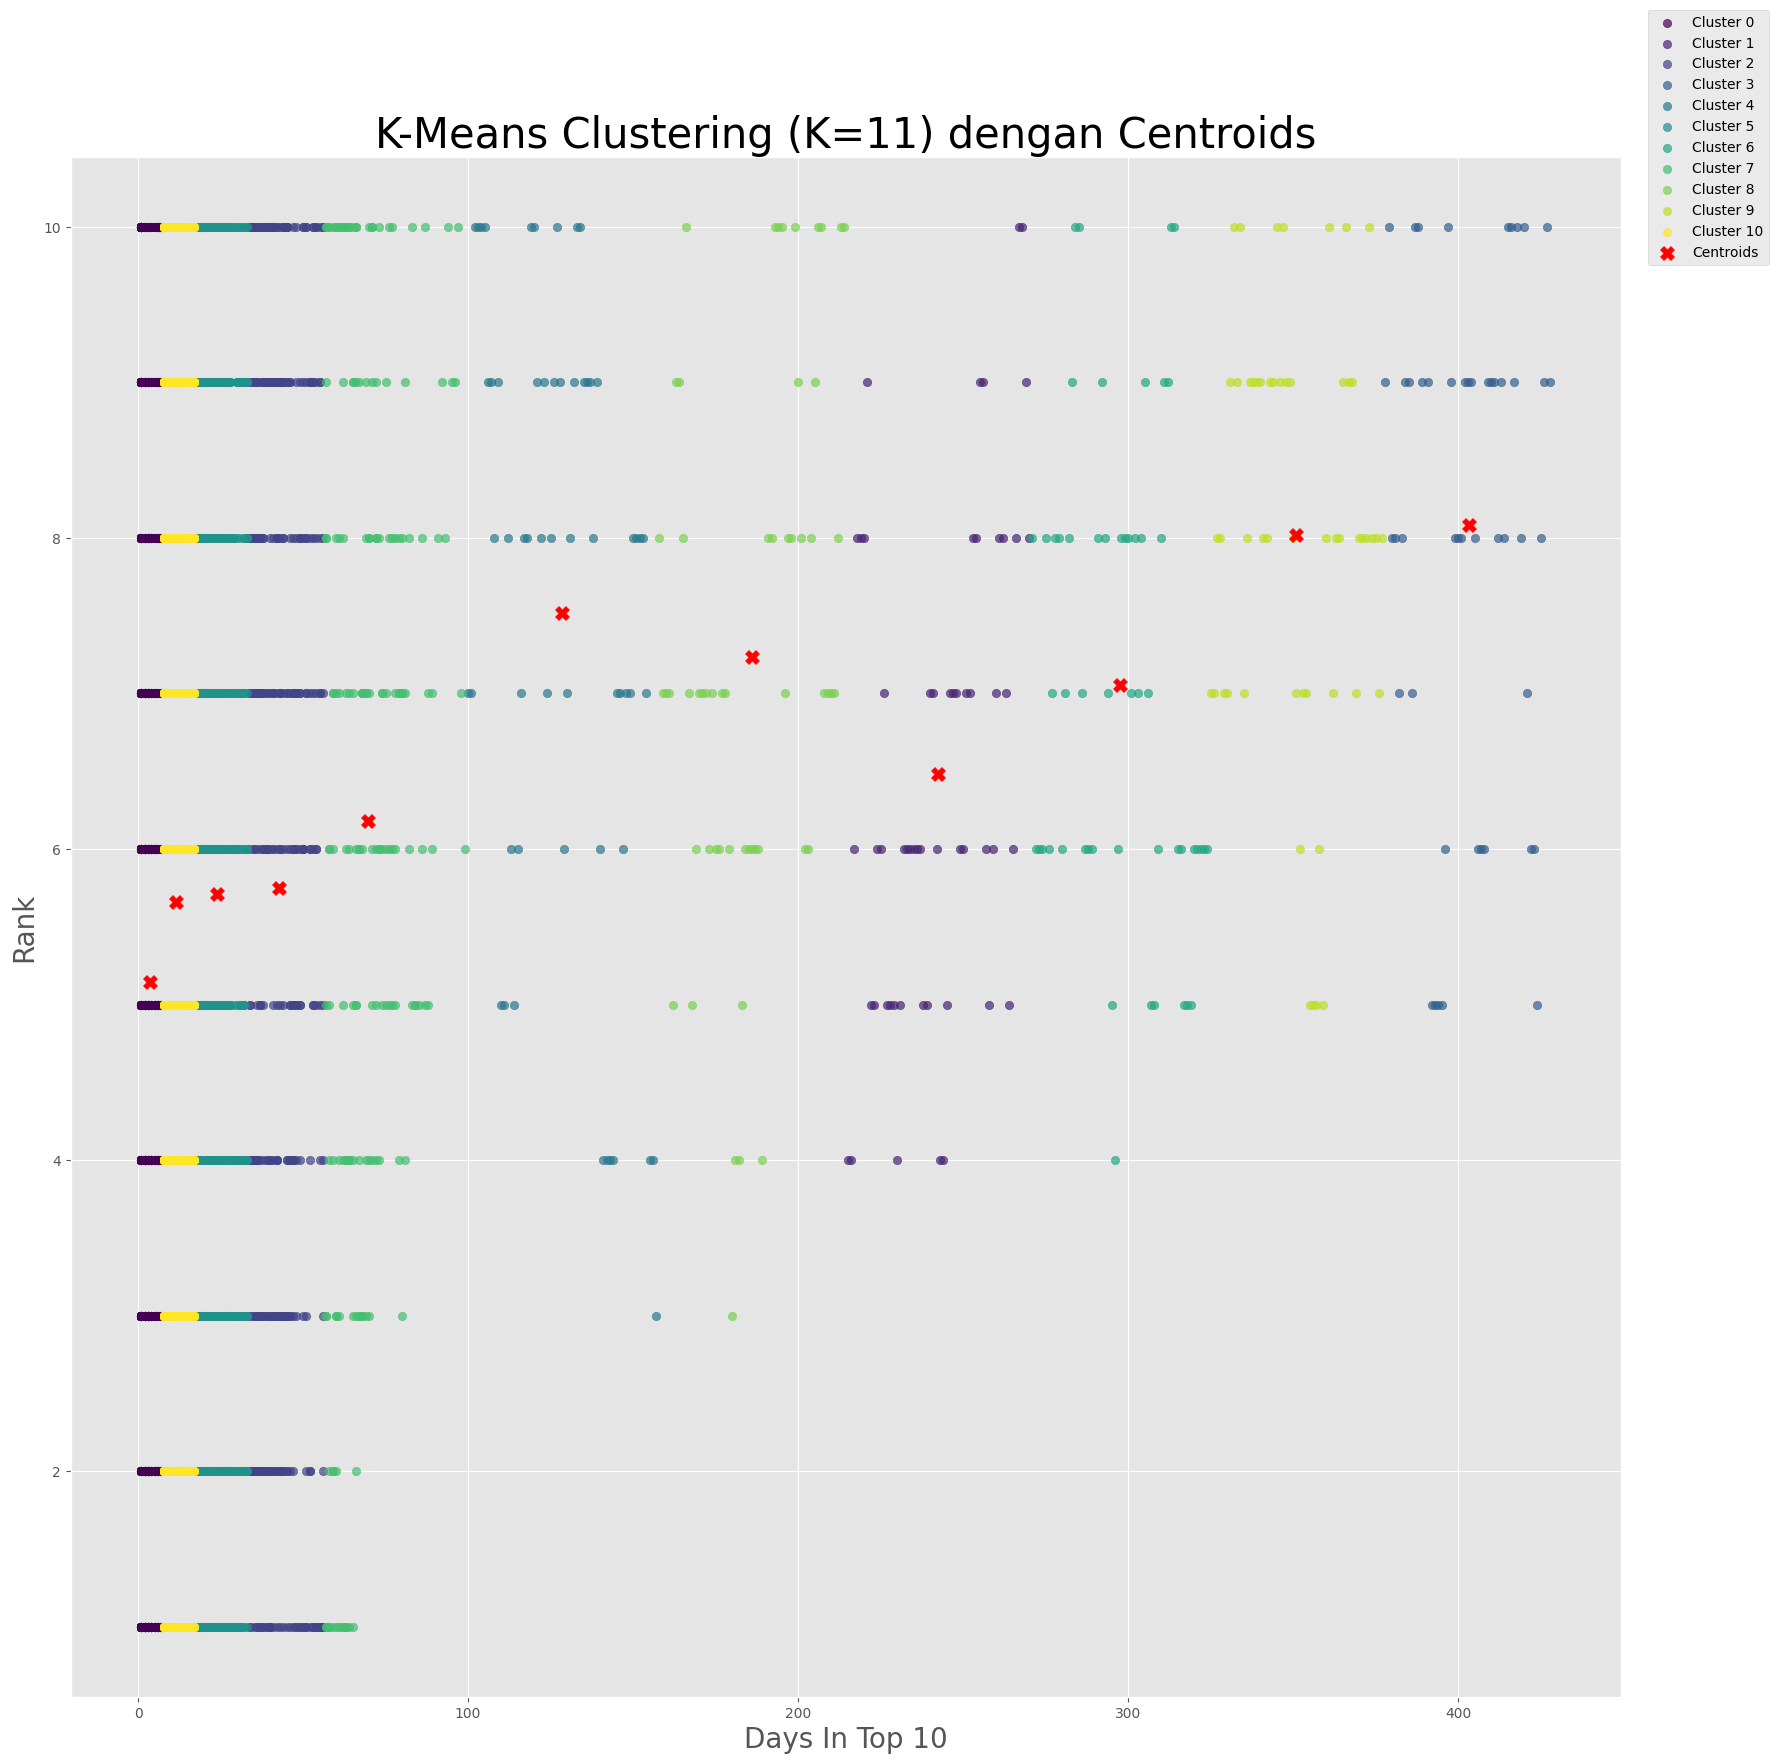

In [139]:
# Mendapatkan koordinat centroid
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20,20))
for cluster in range(K):
    plt.scatter(X['Days In Top 10'][df['Cluster'] == cluster],
                X['Rank'][df['Cluster'] == cluster], 
                label=f'Cluster {cluster}', 
                alpha=0.7,
                c=[colors(cluster / K)])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Days In Top 10', fontsize=20)
plt.ylabel('Rank', fontsize=20)
#plt.title('K-Means Clustering with Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids", fontsize=30)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()